In [2]:
import os
os.chdir('../../')

In [4]:
cd Python/Entropy_Learning/

/home/gnux/Python/Entropy_Learning


In [3]:
from functions.entropy_calculation import empirical_entropy
from functions.gallistel_information import gallistel_information
from functions.gallistel_information import reyes_cp
from functions.generate_pdf import generate_pdf, calculate_cs_us
from functions.matrix_to_df import matrix_to_df
from functions.bootstrap import shuffle_data
from functions.bootstrap import bootstrap
from functions.bootstrap import real_cp

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy import io as spio
from scipy.stats import norm
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import seaborn as sns

sns.set_style('darkgrid')
plt.style.use('dark_background')
mpl.rc("figure", figsize=(10,6))
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.facecolor'] = (1,1,1,0)
mpl.rcParams['figure.facecolor'] = (1,1,1,0)
sns.set_palette('deep', color_codes=True)

# range = (0, 70)
# rat_number = np.arange(70)
# matrix_data = [matrix_to_df(spio.loadmat('data/raw/Notes/AB10'+ str(i) +'.001.mat')['D']) for i in rat_number]


In [6]:
names=['AB100' + str(n) + '.001.mat' if n<=9 
       else 'AB10' + str(n) + '.001.mat' for n in range(1,76)]

name_error = ['AB1031.001.mat']

n_rats = len(names) - len(name_error)
all_rats = [matrix_to_df(spio.loadmat('data/raw/'+ name)['D']) for name in names if name != name_error[0]]

In [7]:
x = [calculate_cs_us(all_rats[i])for i in np.arange(n_rats)]

In [8]:
CS = [x[i][0] for i in np.arange(n_rats)]
US = [x[i][1] for i in np.arange(n_rats)]


In [9]:
#Selects rats with fixed time

fixed_time = [n for n in range(n_rats)
              #verifies if time is fixed
              if len(np.unique(all_rats[n]['time_to_win'])) == 1 
              #verifies number of trials
              and len(all_rats[n]) >= 100]

n_rats_fixed = len(fixed_time)

# Full Distributions

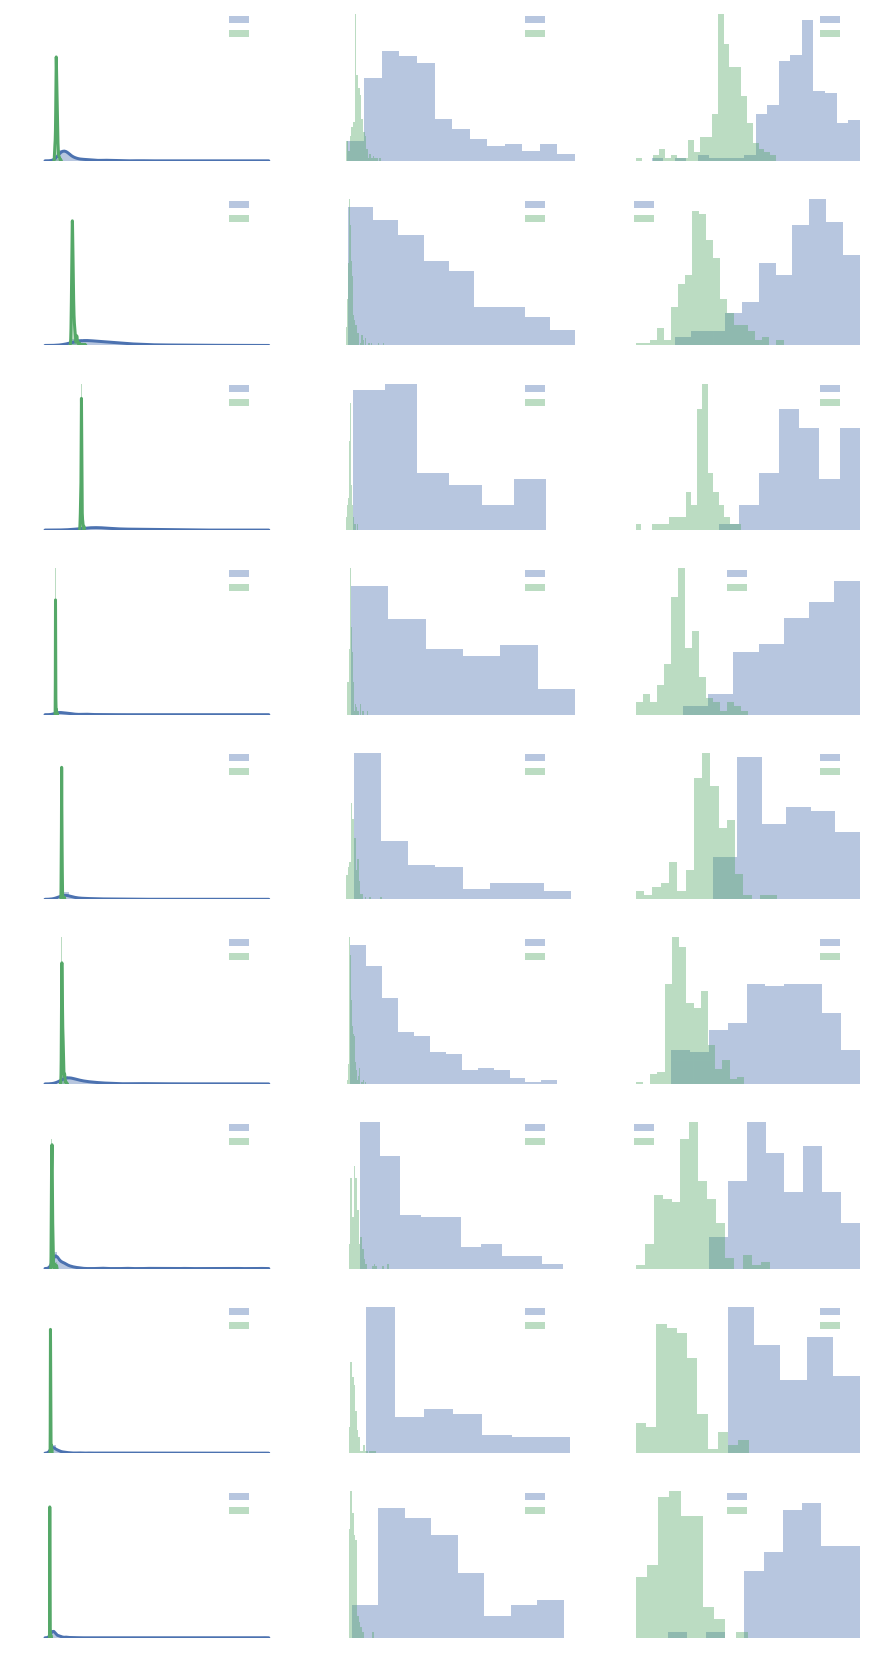

In [9]:
plt.figure(figsize=(15,30))
j=0
for i in range(n_rats_fixed):
    plt.subplot(n_rats_fixed, 3, 3*(j)+1)
    sns.distplot(US[i], kde=True, hist=True, label='US')
    sns.distplot(CS[i], kde=True, hist=True, label='CS')    
    plt.legend()
    
    plt.subplot(n_rats_fixed, 3, 3*(j+1)-1)
    sns.distplot(US[i][US[i]<=30], kde=False, hist=True, label='US')
    sns.distplot(CS[i][CS[i]<=30], kde=False, hist=True, label='CS')    
    plt.xlim(-2,30)
    plt.legend()
    
    plt.subplot(n_rats_fixed, 3, 3*(j+1))
    sns.distplot(np.log10(US[i][US[i]<=30]), kde=False, hist=True, label='US')
    sns.distplot(np.log10(CS[i][CS[i]<=30]), kde=False, hist=True, label='CS')    
    plt.legend()
    j += 1

In [12]:
change_point = [reyes_cp(all_rats[i]['t'], 20) for i in fixed_time]

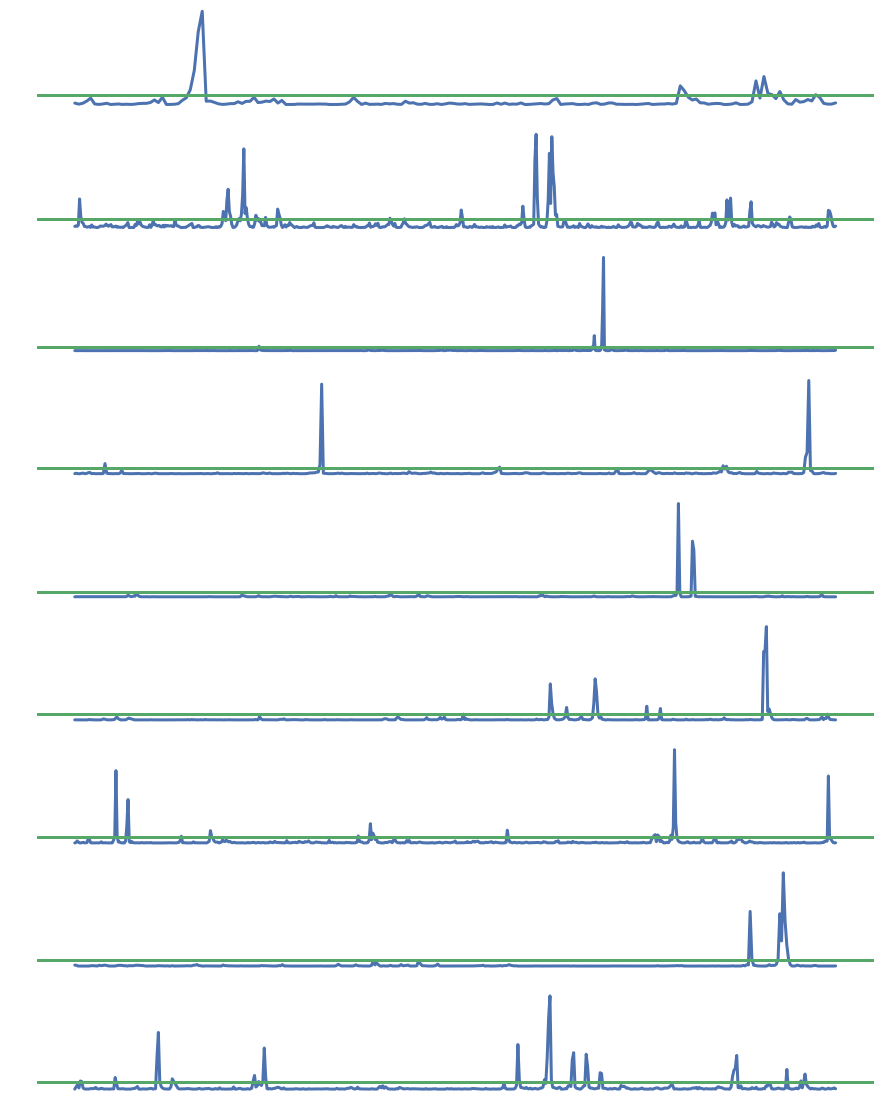

In [11]:
plt.figure(figsize=(15,20))

for i in range(9):
    plt.subplot(9, 1, i+1)
    x = np.arange(len(change_point[i]))
    y = change_point[i]
    std = np.std(change_point[i])
    plt.plot(x, change_point[i])
    plt.axhline(std, linestyle ='-', color='g')

## Bootstrap

In [13]:
#list of times ['t'] of fixed time rats
all_rats_fixed = [all_rats[i]['t'].values for i in fixed_time]
z = shuffle_data(all_rats_fixed, 1000)

In [14]:
#Don't try bootstrap if shuffle_data > 1000
z2= bootstrap(z)

In [17]:
#real_cp overflows memory with more than 1 array 
z3 = [z2[0].copy(), z2[1].copy(), z2[2].copy()]

15426

In [ ]:
cp_cut = real_cp(z3, .1)[0]

In [ ]:
cp_cut

## Codificacao logaritmica do tempo? 

In [ ]:
p  = np.random.normal(size=1000)
g =  np.random.normal(size=1000) + 10

sns.distplot(1.15**p)
sns.distplot(1.15**g)

## Validation Codes and Test

In [ ]:
#Validates unique's caracteristic of 'time to win' 

size = [len(all_rats[n]) for n in range(n_rats)]

for n in range (len(fixed_time)):
    print (len(all_rats[fixed_time[n]]))

In [ ]:
#validates shuffled data

test = shuffle_data(change_point, 1)

plt.figure(figsize = (8, 5))
for i in range(len(change_point)):
    plt.scatter(i, change_point[i].sum())
    plt.scatter(i, np.nansum(test[i]))

In [ ]:
#Validates real change point function

arr = [norm.rvs(size=1000), norm.rvs(size=500), norm.rvs(size=500)]

bins = 100
n_rats = len(arr)
p = .95

hist_y_bin_edges = [np.histogram(arr[i], bins, density=True) for i in range(n_rats)]

hist = [hist_y_bin_edges[i][0] for i in range(n_rats)]
bin_edges = [hist_y_bin_edges[i][1] for i in range(n_rats)]

print(len(bin_edges[2]))

area_sum = [0] * n_rats
real_cp1 = [0] * n_rats

for i in range(n_rats):
    max_min_diff = arr[i].max() - arr[i].min()
    
    dt = max_min_diff/bins
    for j in range(bins):
        if area_sum[i] <= p:
            area_sum[i] += hist[i][j] * dt
            real_cp1[i] = bin_edges[i][j+1]
            
            
print(area_sum[0], real_cp1[0])

In [ ]:
#Validades real_cp function bin X dt compatibility
dt = (arr[0].max()-arr[0].min())/bins
z7 = real_cp(arr, dt)
z7

In [ ]:
#Graphs output bootstrap (arr not cp_odds)

plt.figure(figsize=(15,20))

for i in range(9):
    plt.subplot(9, 1, i+1)
    x = np.arange(len(z2[i][0]))
    y = z2[i][0]
    std = np.std(z2[i][0])
    plt.plot(x, z2[i][0])
    #plt.scatter(x, array[i][0])
    plt.axhline(std, linestyle ='-', color='g')